In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime


### Loading the Transactions Data from the excel file

In [2]:
trans = pd.read_excel("Raw_data.xlsx",sheet_name="Transactions")

In [3]:
### Checking the first five data

trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
## information of  columns and data-types of Transaction Data.

trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

The datatypes of product_first_sold_date column is not in datetime format. The format must change from float64 to datetime format.

#### Total Records

In [5]:
print(f"Total records : {trans.shape[0]} ")
print(f"Total Fields : {trans.shape[1]} ")

Total records : 20000 
Total Fields : 13 


##### Numerical records

In [6]:
df_numeric = trans.select_dtypes(include=[np.number])
numeric_columns = df_numeric.columns.values


df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_columns = df_non_numeric.columns.values


print(numeric_columns)
print(non_numeric_columns)

['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


#### Missing Values

Checking for the missing values in the dataset

In [7]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
# percentage of the missing values

trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

It is observed that the columns which have highest missing values are online_order. Rest are brand, product_line, product_class, product_size, standard_cost, product_first_sold_date also have missing values.


##### Let's deal with the missing values one by one.

##### 1. online_order
online_order has the most missing values. The online_order contains a categorical values. Which seems that the missing values can be filled with mode values.

In [9]:
trans.online_order.isnull().sum()

360

In [10]:
most_frequent_value=trans.online_order.mode()
print(f"most frequent value:{most_frequent_value[0]}")

trans.online_order.fillna(1, inplace=True)

most frequent value:1.0


In [11]:
trans.online_order.value_counts()

1.0    10189
0.0     9811
Name: online_order, dtype: int64

#### 2  Brand, product_line, product_class, product_size, standard_cost, product_first_sold_date
Since the missing value is 1% of the data we can drop that data

In [12]:
trans[['brand','product_line','product_class','product_size','standard_cost','product_first_sold_date']].isnull().sum()

brand                      197
product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197
dtype: int64

In [13]:
trans.dropna(inplace=True)

finally there are no missing values in the dataset.

In [14]:
trans.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [15]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# 2. Creating a new feature "Profit"

###### The profit column will be the difference between list_price and the strandard cost

In [16]:
trans['profit'] = trans['list_price'] - trans['standard_cost']

In [17]:
trans

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


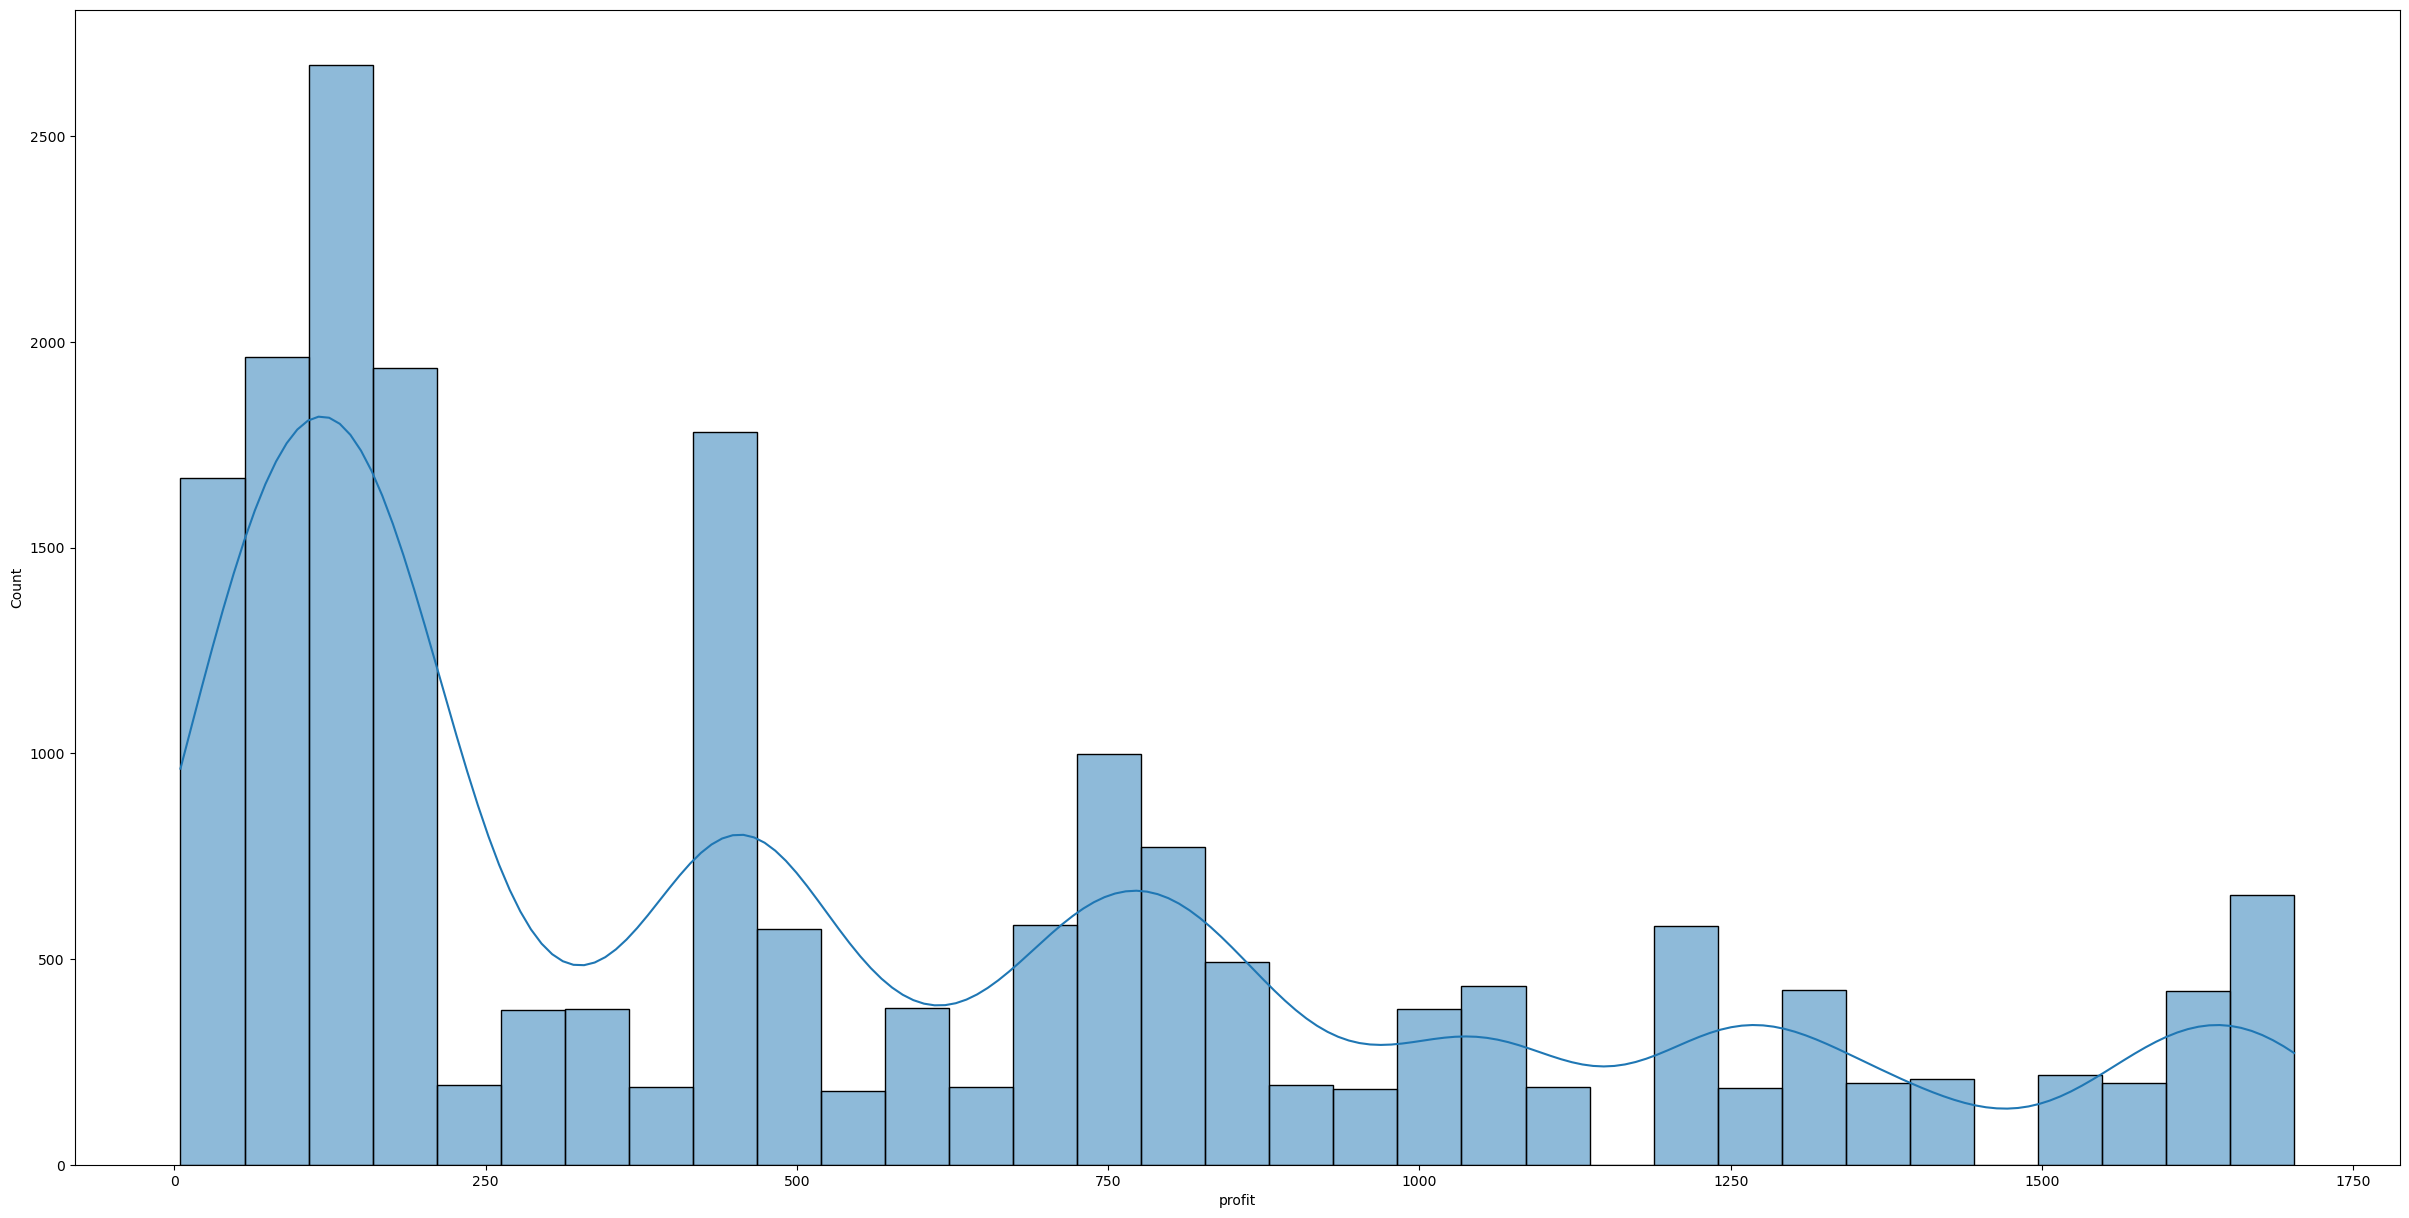

In [24]:
#distribution of profit column

plt.figure(figsize=(30,15))
# sns.distplot(trans['profit'])
sns.histplot(trans['profit'],kde=True)

plt.show()

# 3. Inconsistency Check in Data

We will check is there any inconsistency in the data in the following Categorical columns. 

The columns which need to be checked are <b> "online_order","order status","product_line","product_class", "product_size", "brand" <b>

In [19]:
# Online_order

trans.online_order.value_counts()

1.0    10097
0.0     9706
Name: online_order, dtype: int64

In [20]:
# order_status

trans.order_status.value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [25]:
#product_line

trans.product_line.value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [26]:
# product class

trans.product_class.value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [28]:
# product size

trans.product_size.value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [29]:
# brand

trans.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

# 4. Check the Duplicate values

Check if the table having duplicate values or not.

In [47]:
trans_dedupped = trans.drop("transaction_id",axis=1).drop_duplicates()

In [52]:
print(f'The number of records after droping the duplicate : {trans_dedupped.shape[0]}')
print(f'The number of records in the dataframe : {trans.shape[0]}')

The number of records after droping the duplicate : 19803
The number of records in the dataframe : 19803


Since both number are same. Seems that there is no duplicate entries in the Dataframe.

# 5. Exporting the data into CSV file.

Exporting the clean data set in the CSV file.

In [53]:
trans.to_csv("Transaction_cleaned.csv",index=False)